#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.03 Convolving and Filtering - Time Domain</font>

# <font color=red>Literacy</font>



## <font color=red>L.1) Convolving</font>

By hand, convolve the kernel {d, e, f} with the timeseries {3, 4, 5, 6, 7, 8, 9}. The new timeseries should
be shorter. ("By hand" can be in a text editor of your choice, as well as on paper. Or skip this task entirely if you feel very clear about how to do it.)

## <font color=red>L.2) Mean Activity</font>

Here is a 12 Hz wave digitized at 100 Hz. 12 full periods are completed over a 1 second interval.

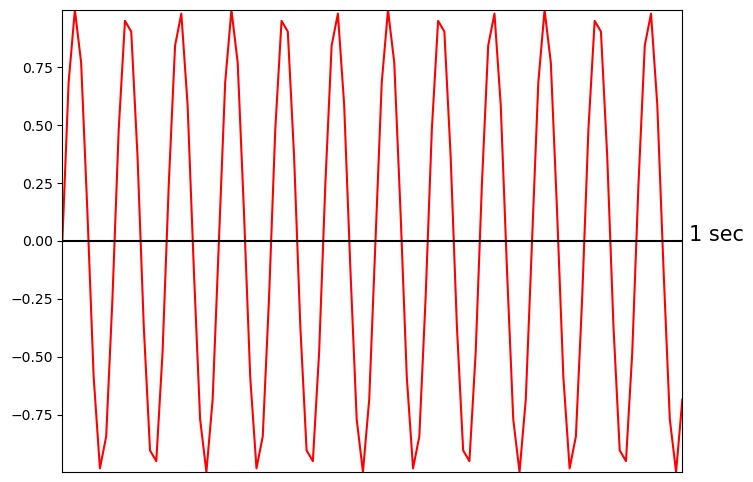

In [2]:
time = np.arange(0,1,1/100)
freq =12
timeseries = np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

What is the average strength (amplitude or magnitude) of the 12 Hz activity over the 1 second interval? ___________

What is the DC offset? _____________

## <font color=red>L.3) Mean Activity</font>

Here is a 20 Hz wave digitized at 100 Hz. 20 full periods are completed over a 1 second interval.

In [3]:
time = np.arange(0,1,1/100)
freq =20
timeseries = np.sin(2*np.pi * freq * time) + 5

make_plot_1(time,timeseries,'r')
plt.text(1,5,'1 sec',fontsize=15)
plt.ylim([4,6])
plt.show()

Estimate the average strength (amplitude or magnitude) of the 20 Hz activity over the 1 second interval. __________

Estimate the DC offset. _____________

What value would you need to subtract from each datapoint to remove the DC offset? ____________

## <font color=red>L.4) Convolution</font>

Here are a series of values: {3, 9, 12, -3, 3, 9, 6, -12, -9, 3, 6, -6, 3, -6}. By hand, convolve the series with
the kernel { 1/3 , 1/3 , 1/3 } and plot the new series.

## <font color=red>L.5) Convolution</font>

Here are a series of values: {2, 10, 4, -4, 18, 4, 6, -4, -10, 8, 4, -10, 2, 8}. By hand, convolve the series with
the kernel { 1/2 , 1/2 } and plot the new series.

## <font color=red>L.6) Filtering</font>

This timeseries was created by summing 5 Hz and 50 Hz activity. Data were digitized at 300 Hz.

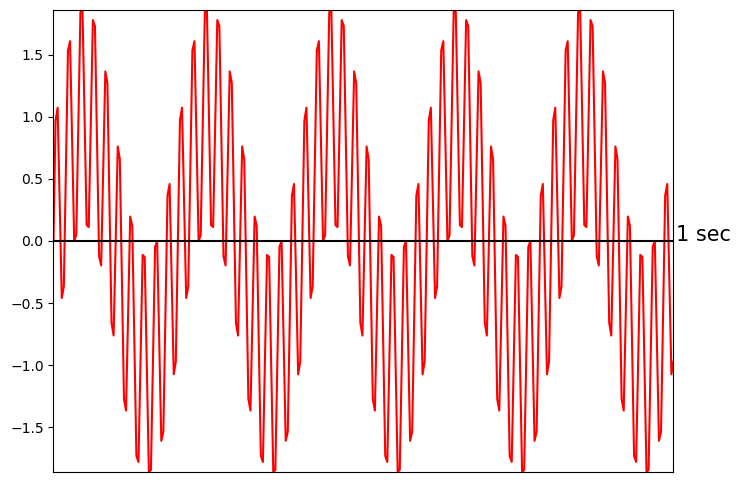

In [4]:
time = np.arange(0,1,1/300)
freq1 = 5
freq2 = 50
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

What is the optimal kernel size to remove the 50 Hz noise via the moving-average convolution technique? ___________

## <font color=red>L.7) Filtering</font>

The timeseries below is the sum of 3 Hz, 70 Hz, and 100 Hz activity.
Data were digitized at 300 Hz.

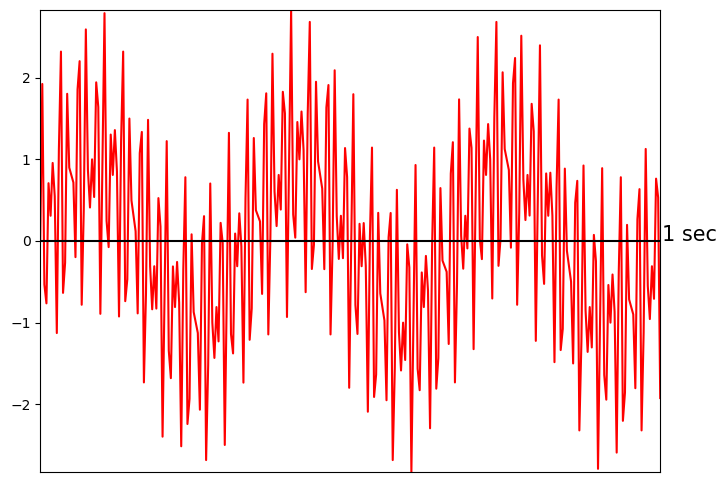

In [5]:
time = np.arange(0,1,1/300)
freq1 = 3
freq2 = 70
freq3 = 100
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)+ np.sin(2*np.pi * freq3 * time)

make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

What is the optimal kernel size to remove the 70 Hz noise via the moving-average convolution technique? ___________

Write out the kernel. ______________________

What is the optimal kernel size to remove the 100 Hz noise via the moving average convolution technique? __________

Write out the kernel. ______________________

## <font color=red>L.8) Low- or high-pass filter</font>

Here is a timeseries digitized at 300 Hz, with equal power at all frequencies.

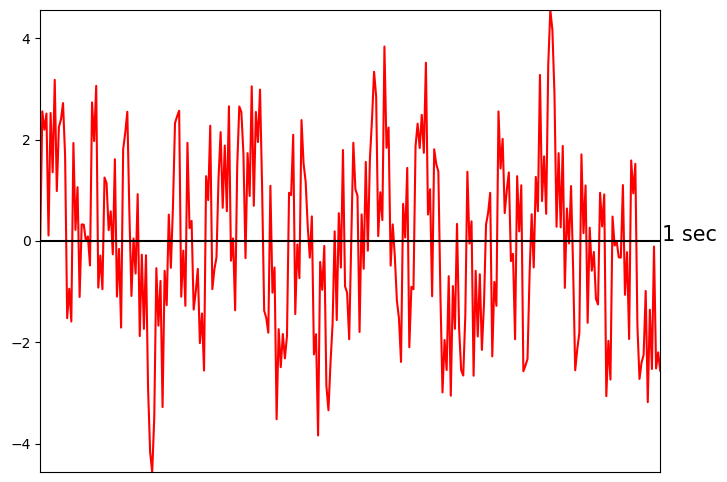

In [6]:
time = np.arange(0,1,1/300)
freq1 = 4
freq2 = 10
freq3 = 15
freq4 = 38
freq5 = 60
freq6 = 136
timeseries = np.sin(2*np.pi * freq1 * time) + np.sin(2*np.pi * freq2 * time)+ np.sin(2*np.pi * freq3 * time) + \
            np.sin(2*np.pi * freq4 * time) + np.sin(2*np.pi * freq5 * time)+ np.sin(2*np.pi * freq6 * time)


make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Below, the timeseries was then filtered using an equal-weight kernel of size 10:
{ 1/10 , 1/10 , 1/10 , 1/10 , 1/10 , 1/10 , 1/10 , 1/10 , 1/10 , 1/10 } .

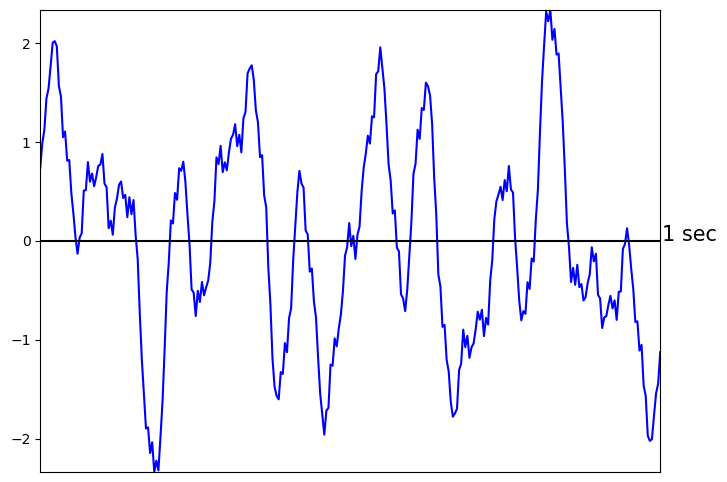

In [7]:
from scipy import signal

kernel = 1/10 * np.ones(10)
newydata = signal.convolve(timeseries,kernel,mode='same')

make_plot_1(time,newydata)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Here is a plot of the power spectrum for the filtered data.

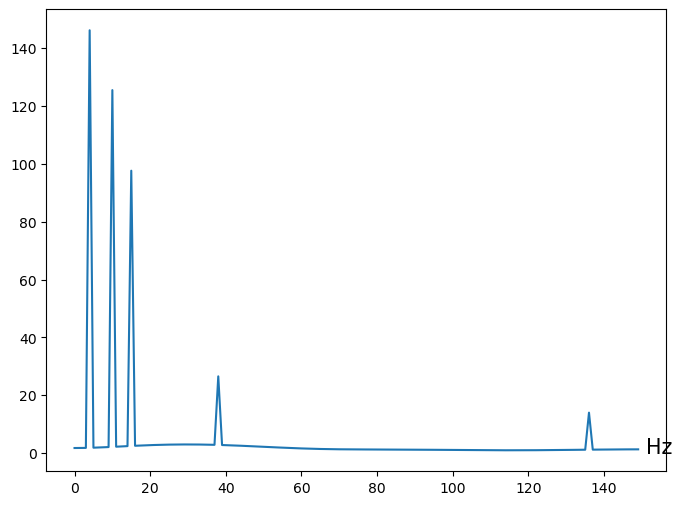

In [8]:
make_plot_freq_1(newydata,300)

# Adding text to the figure
plt.text(151,0,'Hz',fontsize=15)
plt.show()

Write a sentence noting the type of filter applied. Describe what aspect of the plot allowed you to draw
your conclusion.

## <font color=red>L.9) Convolution</font>

Describe the convolution process, in the general case (not just one of the filtering examples above.

## <font color=red>L.10) Convolution</font>

When you convolve a kernel with a timeseries, why is the length of the filtered timeseries sometimes a
bit shorter than the unfiltered timeseries?

## <font color=red>L.11) Convolution</font>

When convolving a kernel with a timeseries, describe one procedure you could apply so that the unfiltered
and filtered timeseries are of equal length.

## <font color=red>L.12) Convolving</font> 

Show the convolution of the kernel {d, e, f} with the timeseries {3, 4, 5, 6, 7, 8, 9}. Pad with 1s so that the
new timeseries is the same length as the original timeseries.

## <font color=red>L.13) Filtering Terms</font> 

Define the terms low-pass and high-pass.

## <font color=red>L.14) FIR Filters</font>  

Describe the principle characteristic of a nonrecursive or a Finite Impulse Response filter.

## <font color=red>L.15) Gain Plots</font>

Use this gain plot to help answer the questions below.

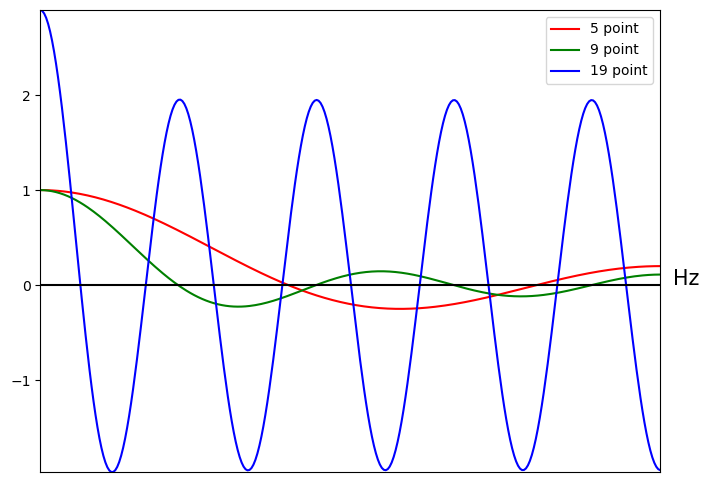

In [9]:
omega = np.arange(0,np.pi,0.01)
freq = omega / (2*np.pi)

timeseries1 = 1/5 * (1 + 2 * np.cos(omega) + 2 * np.cos(2*omega))
timeseries2 = 1/9 * (1 + 2 * np.cos(omega) + 2 * np.cos(2*omega) + 2 * np.cos(3*omega) + 2 * np.cos(4*omega))
timeseries3 = 1/19 * (1 + 2 * np.cos(omega) + 2 * np.cos(2*omega) + 2 * np.cos(3*omega) + 2 * np.cos(4*omega) + \
                    + 2 * np.cos(5*omega) + 2 * np.cos(6*omega) + 2 * np.cos(7*omega) + 2 * np.cos(8*omega)) + \
                    + 2 * np.cos(9*omega)

make_plot_3(freq,timeseries1,"r",freq,timeseries2,"g",freq,timeseries3,"b")
plt.text(0.51,0,'Hz',fontsize=15)
plt.legend(["5 point", "9 point", "19 point"], loc="upper right")

plt.show()

Note the colors in the plot's legend, then circle the correct answer (one word) in each of these 3 questions:
    
When more terms are added to the moving-average kernel, more / less high-frequency activity is
removed.

When more terms are added to the moving-average kernel, the transition band is more / less narrow.

When more terms are added to the moving-average kernel, the transfer function values are squeezed closer to / further from the x axis.

## <font color=red>L.16) Transfer Functions</font>

Calculate the transfer function for the following moving average filter: 1/9 {1, 1, 1, 1, 1, 1, 1, 1, 1} .
    
Show your answer in terms of complex exponentials as well as cosines.